In [1]:
#!pip install opencv-python matplotlib seaborn pandas numpy

In [2]:
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Create output directory for plots
output_plots_dir = Path('/kaggle/working/plots')
output_plots_dir.mkdir(exist_ok=True)
print(f"Plots will be saved to: {output_plots_dir}")

print(f"Plots will be saved to: {output_plots_dir}")

# Create output directory for plotsoutput_plots_dir.mkdir(exist_ok=True)
output_plots_dir = Path('/kaggle/working/plots')

## 1. Dataset Paths and Configuration

In [4]:
# Kaggle dataset paths
BASE_PATH = "/kaggle/input/daisee/DAiSEE"
TRAIN_DATA_PATH = f"{BASE_PATH}/DataSet/Train"
VAL_DATA_PATH = f"{BASE_PATH}/DataSet/Validation"
TEST_DATA_PATH = f"{BASE_PATH}/DataSet/Test"

TRAIN_LABELS_PATH = f"{BASE_PATH}/Labels/TrainLabels.csv"
VAL_LABELS_PATH = f"{BASE_PATH}/Labels/ValidationLabels.csv"
TEST_LABELS_PATH = f"{BASE_PATH}/Labels/TestLabels.csv"

# Label categories
CATEGORIES = ["Boredom", "Engagement", "Confusion", "Frustration "]
LEVELS = [0, 1, 2, 3]

## 2. Load and Explore Label Files

In [5]:
# Load all label files
train_df = pd.read_csv(TRAIN_LABELS_PATH)
val_df = pd.read_csv(VAL_LABELS_PATH)
test_df = pd.read_csv(TEST_LABELS_PATH)
all_df = pd.read_csv('/kaggle/input/daisee/DAiSEE/Labels/AllLabels.csv')

print("Dataset Split Sizes:")
print(f"Train: {len(train_df)} samples")
print(f"Validation: {len(val_df)} samples")
print(f"Test: {len(test_df)} samples")
print(f"All: {len(all_df)} samples")
print(f"Total: {len(train_df) + len(val_df) + len(test_df)} samples")

Dataset Split Sizes:
Train: 5358 samples
Validation: 1429 samples
Test: 1784 samples
All: 8925 samples
Total: 8571 samples


In [6]:
# Check column names
print("\nTrain DataFrame columns:")
print(train_df.columns.tolist())

print("\nFirst few rows of training data:")
train_df.head()


Train DataFrame columns:
['ClipID', 'Boredom', 'Engagement', 'Confusion', 'Frustration ']

First few rows of training data:


,ClipID,Boredom,Engagement,Confusion,Frustration
0,1100011002.avi,0,2,0,0
1,1100011003.avi,0,2,0,0
2,1100011004.avi,0,3,0,0
3,1100011005.avi,0,3,0,0
4,1100011006.avi,0,3,0,0


In [7]:
# Check for missing values
print("Missing values in Train set:")
print(train_df.isnull().sum())

print("\nMissing values in Validation set:")
print(val_df.isnull().sum())

print("\nMissing values in Test set:")
print(test_df.isnull().sum())

Missing values in Train set:
ClipID          0
Boredom         0
Engagement      0
Confusion       0
Frustration     0
dtype: int64

Missing values in Validation set:
ClipID          0
Boredom         0
Engagement      0
Confusion       0
Frustration     0
dtype: int64

Missing values in Test set:
ClipID          0
Boredom         0
Engagement      0
Confusion       0
Frustration     0
dtype: int64


In [8]:
# Basic statistics
print("Training set statistics:")
train_df[CATEGORIES].describe()

Training set statistics:


,Boredom,Engagement,Confusion,Frustration
count,5358.000000,5358.000000,5358.000000,5358.000000
mean,0.804405,2.413027,0.430198,0.270997
std,0.855973,0.600070,0.692825,0.563085
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000
50%,1.000000,2.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,0.000000
max,3.000000,3.000000,3.000000,3.000000


## 3. Label Distribution Analysis

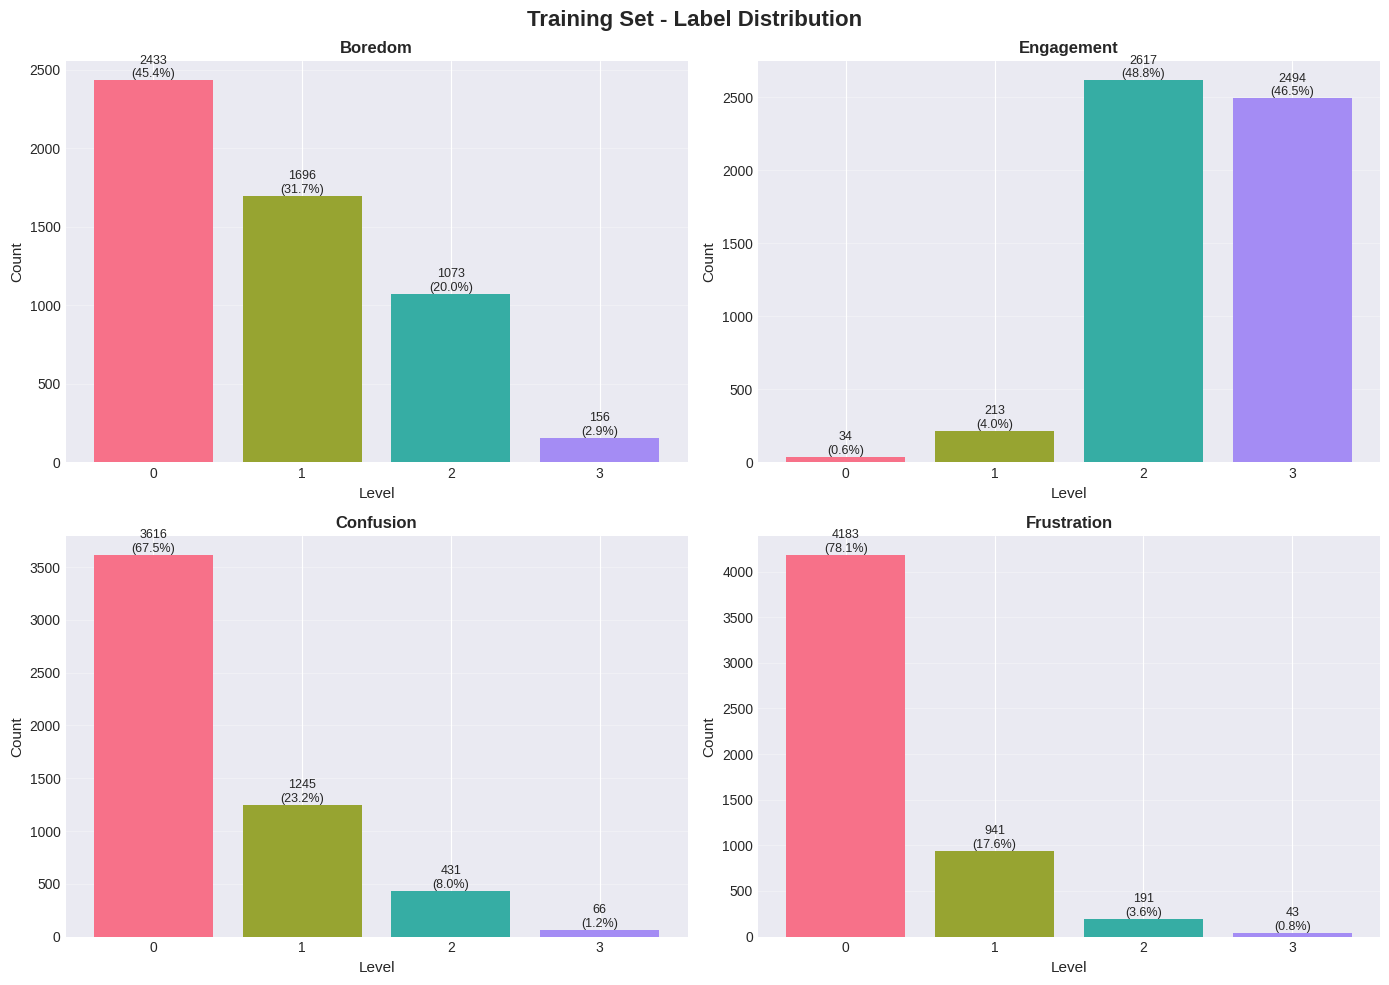

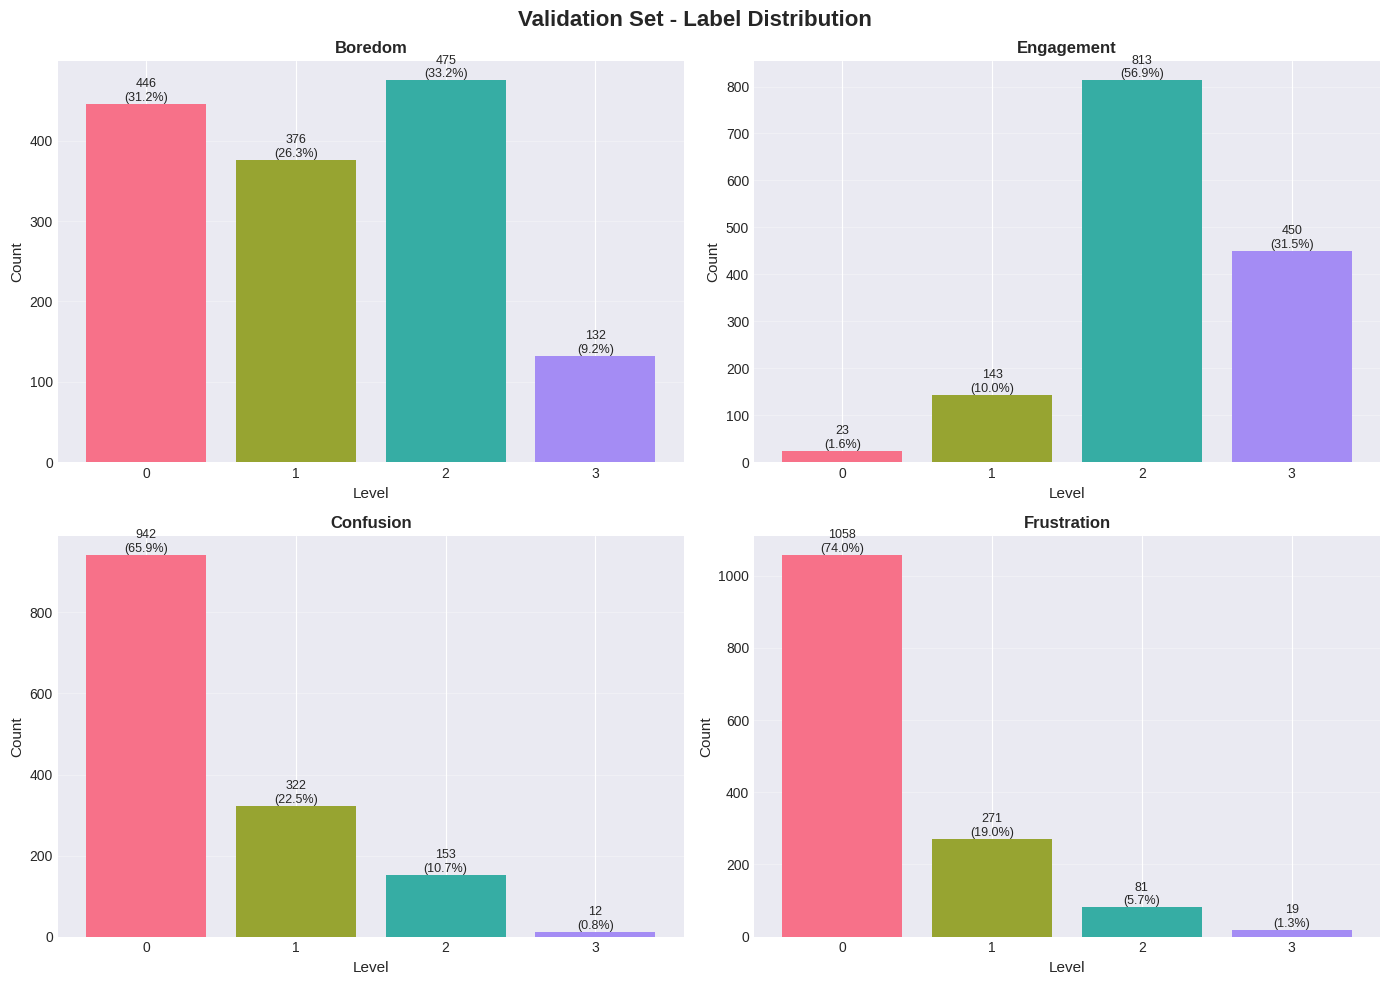

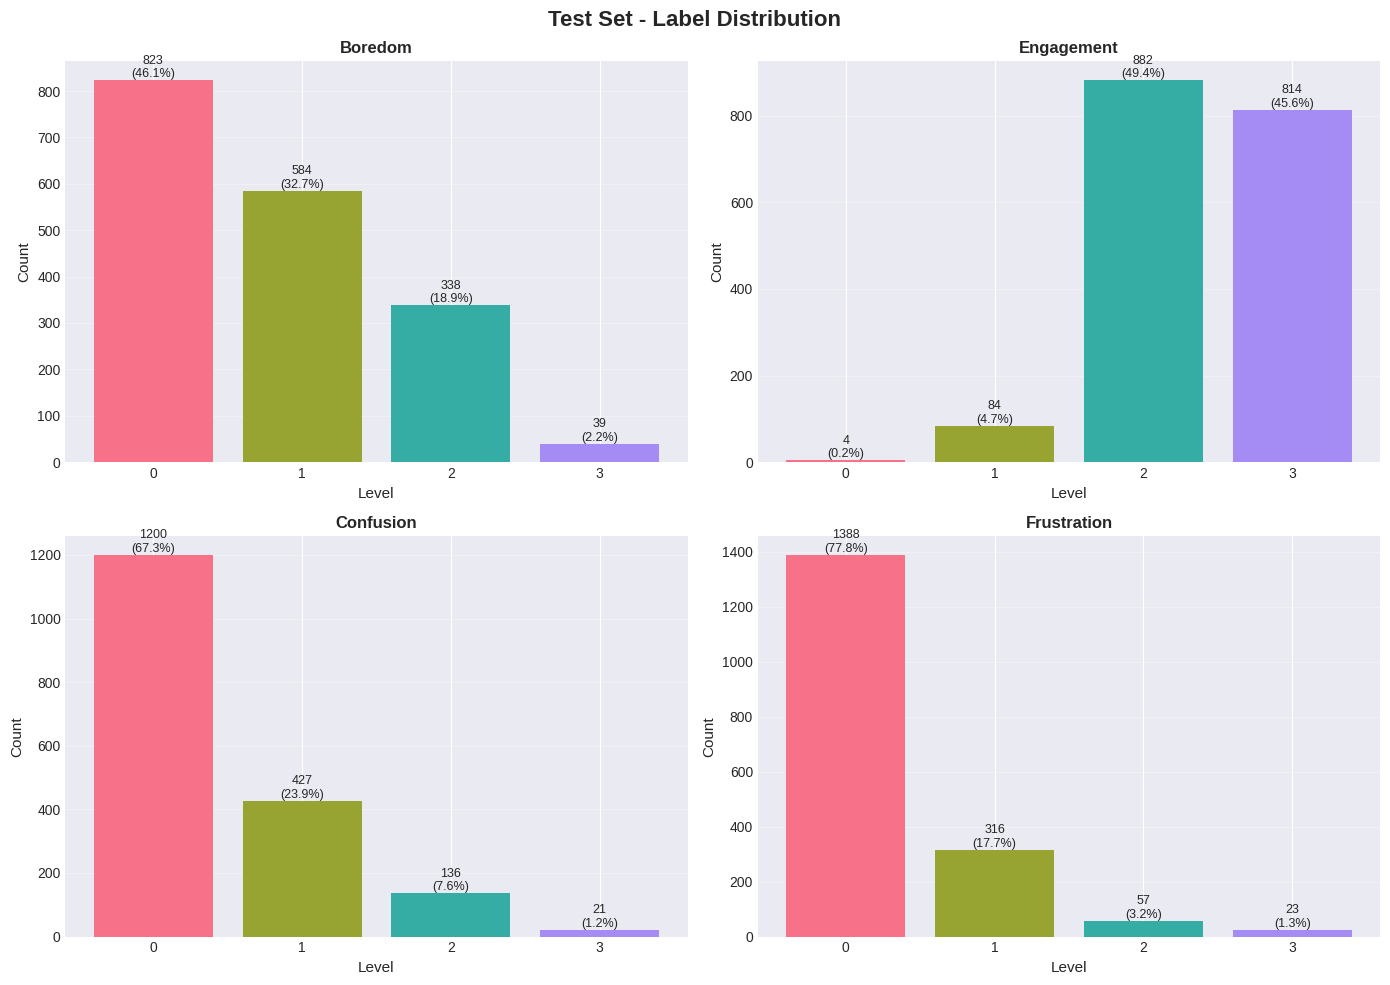

In [ ]:
def plot_label_distribution(df, title, split_name):
    """
    Plot distribution of labels for each category.
    """
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'{title} - Label Distribution', fontsize=16, fontweight='bold')
    
    axes = axes.flatten()
    
    for idx, category in enumerate(CATEGORIES):
        # Count values
        counts = df[category].value_counts().sort_index()
        
        # Plot
        axes[idx].bar(counts.index, counts.values, color=sns.color_palette("husl", 4))
        axes[idx].set_xlabel('Level', fontsize=11)
        axes[idx].set_ylabel('Count', fontsize=11)
        axes[idx].set_title(f'{category.strip()}', fontsize=12, fontweight='bold')
        axes[idx].set_xticks([0, 1, 2, 3])
        axes[idx].grid(axis='y', alpha=0.3)
        
        # Add percentage labels
        total = counts.sum()
        for level, count in counts.items():
            percentage = (count / total) * 100
            axes[idx].text(level, count, f'{count}\n({percentage:.1f}%)', 
                          ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    
    # Save plot
    plot_path = output_plots_dir / f'label_distribution_{split_name}.png'
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"Saved: {plot_path}")
    
    plt.show()

# Plot for each split
plot_label_distribution(train_df, 'Training Set', 'train')
plot_label_distribution(val_df, 'Validation Set', 'val')
plot_label_distribution(test_df, 'Test Set', 'test')

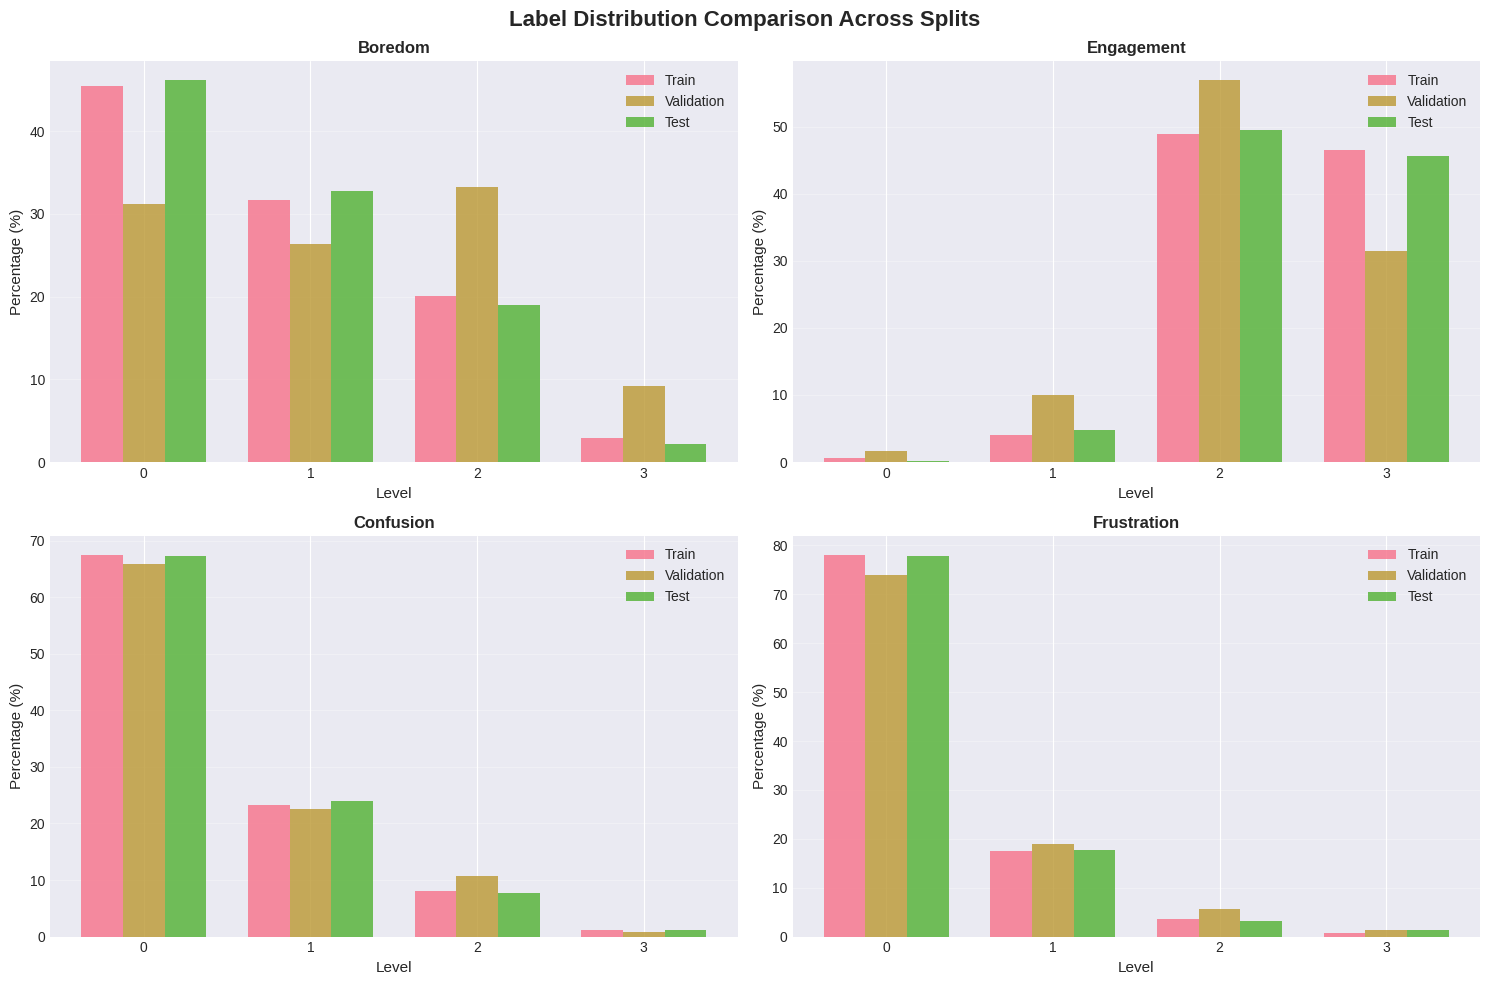

In [ ]:
# Compare distributions across splits
def compare_distributions():
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Label Distribution Comparison Across Splits', fontsize=16, fontweight='bold')
    
    axes = axes.flatten()
    
    for idx, category in enumerate(CATEGORIES):
        # Get percentages for each split
        train_pct = (train_df[category].value_counts(normalize=True).sort_index() * 100)
        val_pct = (val_df[category].value_counts(normalize=True).sort_index() * 100)
        test_pct = (test_df[category].value_counts(normalize=True).sort_index() * 100)
        
        x = np.arange(4)
        width = 0.25
        
        axes[idx].bar(x - width, train_pct, width, label='Train', alpha=0.8)
        axes[idx].bar(x, val_pct, width, label='Validation', alpha=0.8)
        axes[idx].bar(x + width, test_pct, width, label='Test', alpha=0.8)
        
        axes[idx].set_xlabel('Level', fontsize=11)
        axes[idx].set_ylabel('Percentage (%)', fontsize=11)
        axes[idx].set_title(f'{category.strip()}', fontsize=12, fontweight='bold')
        axes[idx].set_xticks(x)
        axes[idx].legend()
        axes[idx].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    
    # Save plot
    plot_path = output_plots_dir / 'distribution_comparison_all_splits.png'
    plt.savefig(plot_path, dpi=300, bbox_inches='tight')
    print(f"Saved: {plot_path}")
    
    plt.show()

compare_distributions()

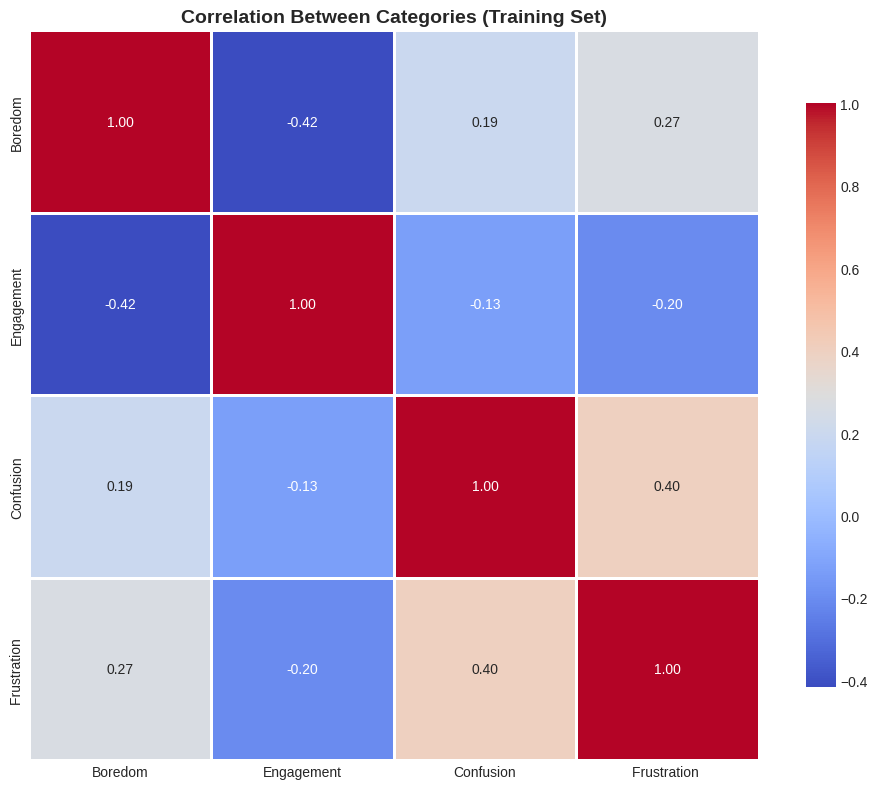

Correlation Matrix:
               Boredom  Engagement  Confusion  Frustration 
Boredom       1.000000   -0.416540   0.192907      0.267624
Engagement   -0.416540    1.000000  -0.129326     -0.204806
Confusion     0.192907   -0.129326   1.000000      0.401151
Frustration   0.267624   -0.204806   0.401151      1.000000


In [ ]:
# Correlation heatmap between categories
plt.figure(figsize=(10, 8))
correlation = train_df[CATEGORIES].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Between Categories (Training Set)', fontsize=14, fontweight='bold')
plt.tight_layout()

# Save plot
plot_path = output_plots_dir / 'correlation_heatmap.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"Saved: {plot_path}")

plt.show()

print("Correlation Matrix:")
print(correlation)

## 4. Video File Analysis

In [12]:
def find_video_path(clip_id, data_path):
    """
    Find the full path to a video file.
    Structure: DataSet/Split/Subject/VideoFolder/VideoFile.avi
    """
    data_path = Path(data_path)
    clip_name = clip_id.replace('.avi', '')
    subject_id = clip_name[:6]
    video_path = data_path / subject_id / clip_name / clip_id
    return video_path

# Test with first video
first_clip = train_df.iloc[0]['ClipID']
first_video_path = find_video_path(first_clip, TRAIN_DATA_PATH)
print(f"First video ClipID: {first_clip}")
print(f"Path: {first_video_path}")
print(f"Exists: {first_video_path.exists()}")

First video ClipID: 1100011002.avi
Path: /kaggle/input/daisee/DAiSEE/DataSet/Train/110001/1100011002/1100011002.avi
Exists: True


In [13]:
def get_video_properties(video_path):
    """
    Extract properties from a video file.
    """
    cap = cv2.VideoCapture(str(video_path))
    
    if not cap.isOpened():
        return None
    
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    duration = frame_count / fps if fps > 0 else 0
    
    cap.release()
    
    return {
        'fps': fps,
        'frame_count': frame_count,
        'width': width,
        'height': height,
        'duration': duration
    }

# Analyze a sample of videos (first 50 from train set)
print("Analyzing sample videos...")
video_properties = []

for idx, row in train_df.head(50).iterrows():
    clip_id = row['ClipID']
    video_path = find_video_path(clip_id, TRAIN_DATA_PATH)
    
    if video_path.exists():
        props = get_video_properties(video_path)
        if props:
            props['clip_id'] = clip_id
            video_properties.append(props)
    
    if (idx + 1) % 10 == 0:
        print(f"Processed {idx + 1} videos...")

props_df = pd.DataFrame(video_properties)
print(f"\nSuccessfully analyzed {len(props_df)} videos")

Analyzing sample videos...
Processed 10 videos...
Processed 20 videos...
Processed 30 videos...
Processed 40 videos...
Processed 50 videos...

Successfully analyzed 50 videos


In [14]:
# Display video properties statistics
print("Video Properties Statistics:")
print(props_df[['fps', 'frame_count', 'width', 'height', 'duration']].describe())

Video Properties Statistics:
        fps  frame_count  width  height  duration
count  50.0         50.0   50.0    50.0      50.0
mean   30.0        300.0  640.0   480.0      10.0
std     0.0          0.0    0.0     0.0       0.0
min    30.0        300.0  640.0   480.0      10.0
25%    30.0        300.0  640.0   480.0      10.0
50%    30.0        300.0  640.0   480.0      10.0
75%    30.0        300.0  640.0   480.0      10.0
max    30.0        300.0  640.0   480.0      10.0


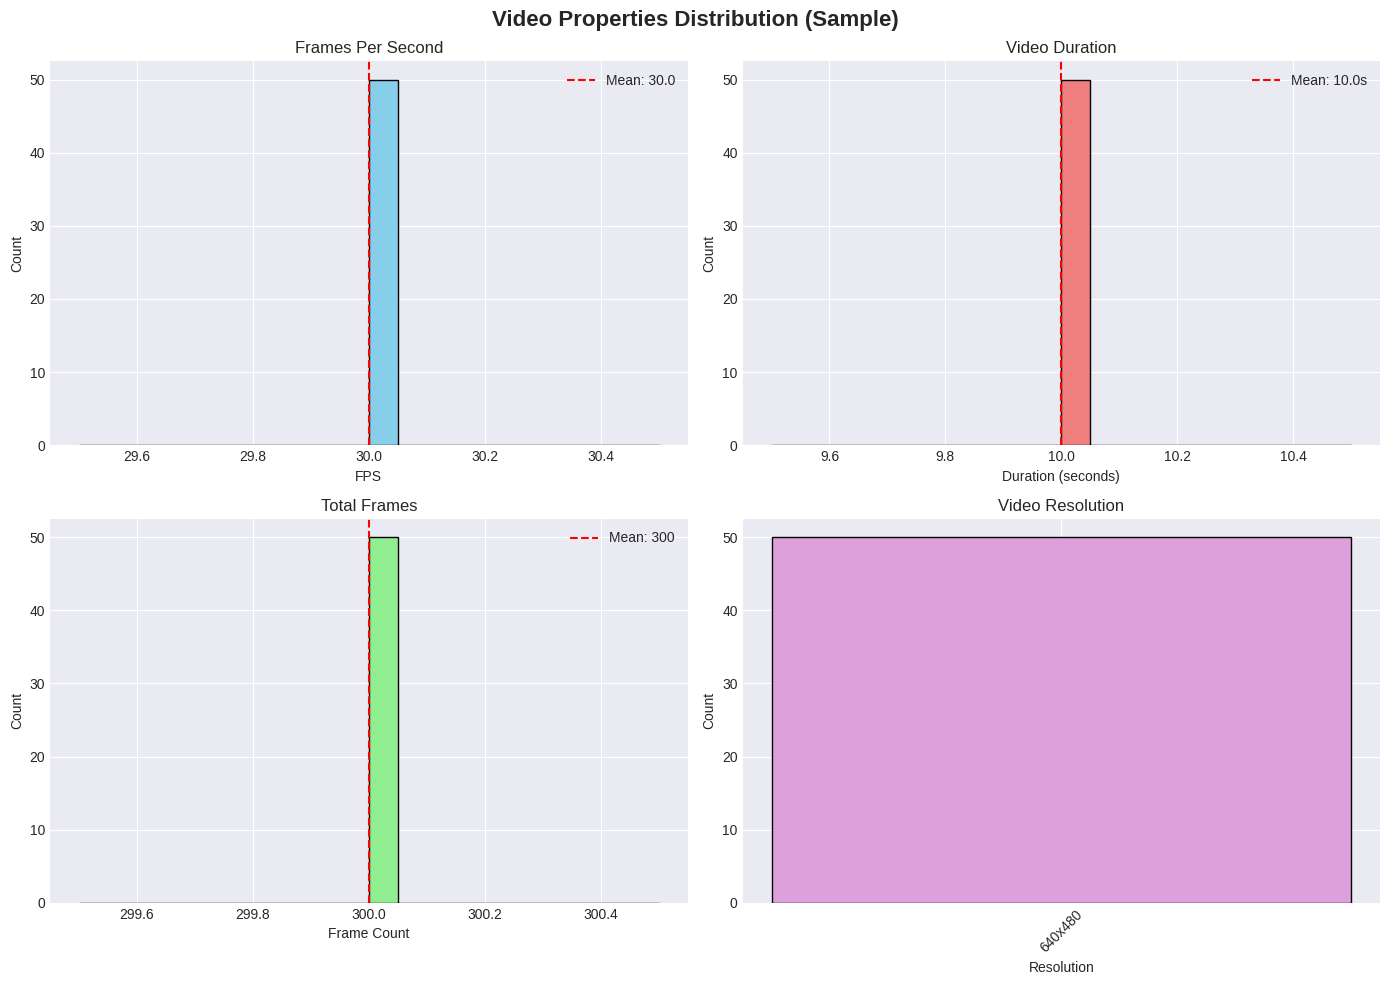

In [ ]:
# Plot video properties
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Video Properties Distribution (Sample)', fontsize=16, fontweight='bold')

# FPS
axes[0, 0].hist(props_df['fps'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('FPS')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Frames Per Second')
axes[0, 0].axvline(props_df['fps'].mean(), color='red', linestyle='--', label=f"Mean: {props_df['fps'].mean():.1f}")
axes[0, 0].legend()

# Duration
axes[0, 1].hist(props_df['duration'], bins=20, color='lightcoral', edgecolor='black')
axes[0, 1].set_xlabel('Duration (seconds)')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Video Duration')
axes[0, 1].axvline(props_df['duration'].mean(), color='red', linestyle='--', label=f"Mean: {props_df['duration'].mean():.1f}s")
axes[0, 1].legend()

# Frame Count
axes[1, 0].hist(props_df['frame_count'], bins=20, color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Frame Count')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Total Frames')
axes[1, 0].axvline(props_df['frame_count'].mean(), color='red', linestyle='--', label=f"Mean: {props_df['frame_count'].mean():.0f}")
axes[1, 0].legend()

# Resolution
resolutions = props_df.apply(lambda x: f"{x['width']}x{x['height']}", axis=1)
resolution_counts = resolutions.value_counts()
axes[1, 1].bar(range(len(resolution_counts)), resolution_counts.values, color='plum', edgecolor='black')
axes[1, 1].set_xlabel('Resolution')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Video Resolution')
axes[1, 1].set_xticks(range(len(resolution_counts)))
axes[1, 1].set_xticklabels(resolution_counts.index, rotation=45)

plt.tight_layout()

# Save plot
plot_path = output_plots_dir / 'video_properties_distribution.png'
plt.savefig(plot_path, dpi=300, bbox_inches='tight')
print(f"Saved: {plot_path}")

plt.show()

## 5. Sample Frame Visualization

Visualizing sample videos from training set:


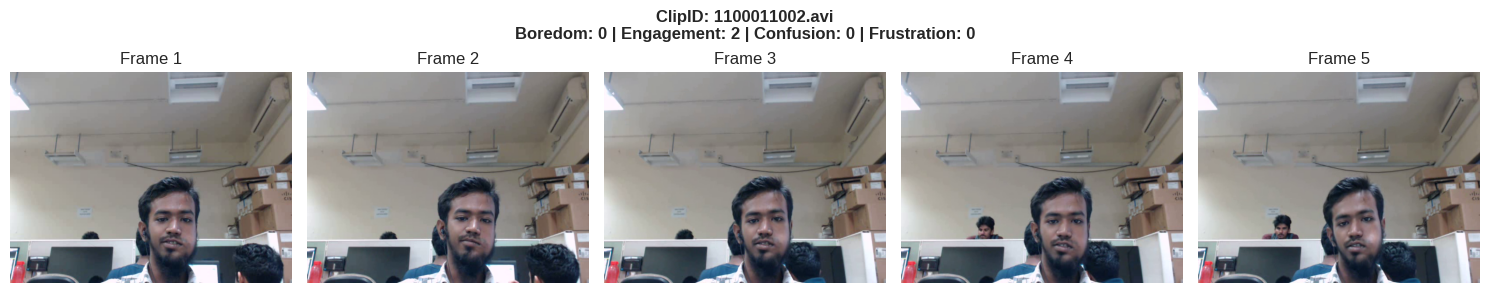

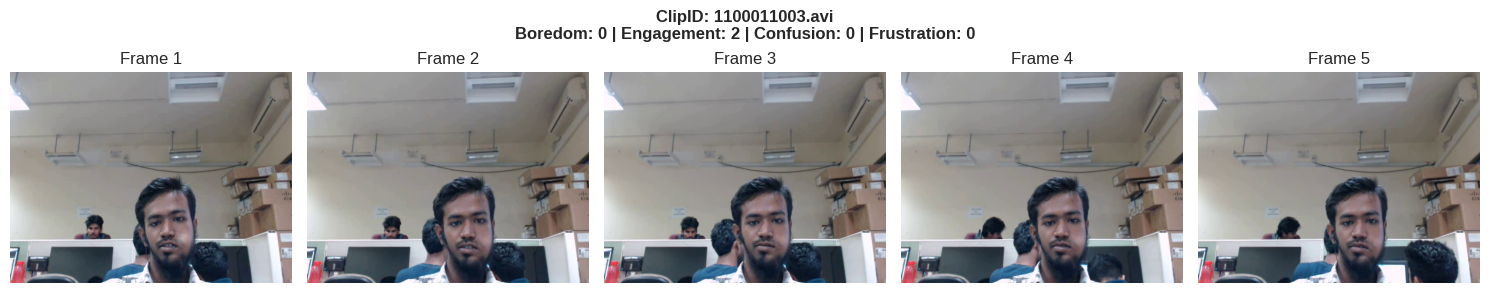

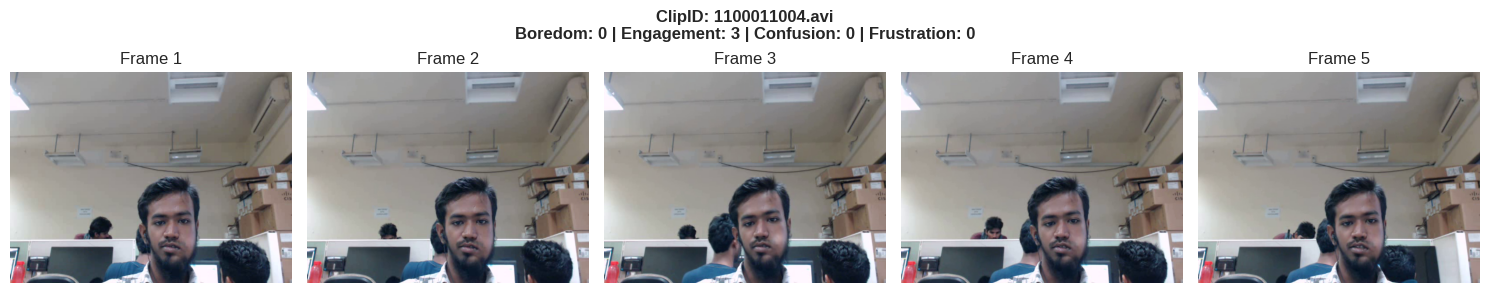

In [ ]:
def extract_frames(video_path, num_frames=5):
    """
    Extract evenly spaced frames from a video.
    """
    cap = cv2.VideoCapture(str(video_path))
    
    if not cap.isOpened():
        return None
    
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = np.linspace(0, frame_count - 1, num_frames, dtype=int)
    
    frames = []
    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            # Convert BGR to RGB
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            frames.append(frame)
    
    cap.release()
    return frames

# Extract and display frames from sample videos
def visualize_sample_videos(df, data_path, num_videos=3, num_frames=5):
    """
    Visualize frames from sample videos with their labels.
    """
    for idx, row in df.head(num_videos).iterrows():
        clip_id = row['ClipID']
        video_path = find_video_path(clip_id, data_path)
        
        if not video_path.exists():
            print(f"Video not found: {clip_id}")
            continue
        
        frames = extract_frames(video_path, num_frames)
        
        if frames:
            fig, axes = plt.subplots(1, num_frames, figsize=(15, 3))
            
            # Create title with label information
            title = f"ClipID: {clip_id}\n"
            for cat in CATEGORIES:
                title += f"{cat.strip()}: {row[cat]} | "
            title = title.rstrip(" | ")
            
            fig.suptitle(title, fontsize=12, fontweight='bold')
            
            for i, frame in enumerate(frames):
                axes[i].imshow(frame)
                axes[i].set_title(f'Frame {i+1}')
                axes[i].axis('off')
            
            plt.tight_layout()
            
            # Save plot
            plot_path = output_plots_dir / f'sample_frames_{clip_id.replace(".avi", "")}.png'
            plt.savefig(plot_path, dpi=300, bbox_inches='tight')
            print(f"Saved: {plot_path}")
            
            plt.show()

print("Visualizing sample videos from training set:")
visualize_sample_videos(train_df, TRAIN_DATA_PATH, num_videos=3, num_frames=5)

## 6. Data Quality Checks

In [17]:
def check_video_accessibility(df, data_path, split_name, sample_size=100):
    """
    Check if videos are accessible and valid.
    """
    print(f"\nChecking video accessibility for {split_name} set (sample of {sample_size})...")
    
    accessible = 0
    not_found = 0
    corrupted = 0
    
    sample_df = df.head(sample_size)
    
    for idx, row in sample_df.iterrows():
        clip_id = row['ClipID']
        video_path = find_video_path(clip_id, data_path)
        
        if not video_path.exists():
            not_found += 1
        else:
            cap = cv2.VideoCapture(str(video_path))
            if cap.isOpened():
                ret, frame = cap.read()
                if ret:
                    accessible += 1
                else:
                    corrupted += 1
                cap.release()
            else:
                corrupted += 1
    
    print(f"Results:")
    print(f"  Accessible: {accessible}/{sample_size} ({accessible/sample_size*100:.1f}%)")
    print(f"  Not found: {not_found}/{sample_size} ({not_found/sample_size*100:.1f}%)")
    print(f"  Corrupted: {corrupted}/{sample_size} ({corrupted/sample_size*100:.1f}%)")
    
    return {'accessible': accessible, 'not_found': not_found, 'corrupted': corrupted}

# Check all splits
train_check = check_video_accessibility(train_df, TRAIN_DATA_PATH, 'Train', sample_size=100)
val_check = check_video_accessibility(val_df, VAL_DATA_PATH, 'Validation', sample_size=50)
test_check = check_video_accessibility(test_df, TEST_DATA_PATH, 'Test', sample_size=50)


Checking video accessibility for Train set (sample of 100)...
Results:
  Accessible: 100/100 (100.0%)
  Not found: 0/100 (0.0%)
  Corrupted: 0/100 (0.0%)

Checking video accessibility for Validation set (sample of 50)...
Results:
  Accessible: 50/50 (100.0%)
  Not found: 0/50 (0.0%)
  Corrupted: 0/50 (0.0%)

Checking video accessibility for Test set (sample of 50)...
Results:
  Accessible: 50/50 (100.0%)
  Not found: 0/50 (0.0%)
  Corrupted: 0/50 (0.0%)


In [18]:
# Check for duplicate ClipIDs
print("Checking for duplicate ClipIDs...")
print(f"Train duplicates: {train_df['ClipID'].duplicated().sum()}")
print(f"Validation duplicates: {val_df['ClipID'].duplicated().sum()}")
print(f"Test duplicates: {test_df['ClipID'].duplicated().sum()}")

# Check for overlapping ClipIDs between splits
print("\nChecking for overlapping ClipIDs between splits...")
train_val_overlap = set(train_df['ClipID']) & set(val_df['ClipID'])
train_test_overlap = set(train_df['ClipID']) & set(test_df['ClipID'])
val_test_overlap = set(val_df['ClipID']) & set(test_df['ClipID'])

print(f"Train-Validation overlap: {len(train_val_overlap)} videos")
print(f"Train-Test overlap: {len(train_test_overlap)} videos")
print(f"Validation-Test overlap: {len(val_test_overlap)} videos")

Checking for duplicate ClipIDs...
Train duplicates: 0
Validation duplicates: 0
Test duplicates: 0

Checking for overlapping ClipIDs between splits...
Train-Validation overlap: 0 videos
Train-Test overlap: 0 videos
Validation-Test overlap: 0 videos


## 7. Label Balance Analysis

In [19]:
def calculate_class_weights(df):
    """
    Calculate class weights for handling imbalanced data.
    """
    weights = {}
    
    for category in CATEGORIES:
        counts = df[category].value_counts().sort_index()
        total = counts.sum()
        
        # Inverse frequency weighting
        cat_weights = {}
        for level in LEVELS:
            if level in counts.index:
                cat_weights[level] = total / (len(LEVELS) * counts[level])
            else:
                cat_weights[level] = 0
        
        weights[category.strip()] = cat_weights
    
    return weights

# Calculate weights for training set
class_weights = calculate_class_weights(train_df)

print("Class Weights (for handling imbalanced data):")
for category, weights in class_weights.items():
    print(f"\n{category}:")
    for level, weight in weights.items():
        print(f"  Level {level}: {weight:.3f}")

Class Weights (for handling imbalanced data):

Boredom:
  Level 0: 0.551
  Level 1: 0.790
  Level 2: 1.248
  Level 3: 8.587

Engagement:
  Level 0: 39.397
  Level 1: 6.289
  Level 2: 0.512
  Level 3: 0.537

Confusion:
  Level 0: 0.370
  Level 1: 1.076
  Level 2: 3.108
  Level 3: 20.295

Frustration:
  Level 0: 0.320
  Level 1: 1.423
  Level 2: 7.013
  Level 3: 31.151


## 8. Summary Statistics

In [22]:
# Create comprehensive summary
summary = {
    'Dataset': ['Train', 'Validation', 'Test', 'Total'],
    'Samples': [len(train_df), len(val_df), len(test_df), len(train_df) + len(val_df) + len(test_df)],
}

summary_df = pd.DataFrame(summary)

print("\n" + "="*60)
print("DAiSEE DATASET SUMMARY")
print("="*60)
print(summary_df.to_string(index=False))

print("\n" + "="*60)
print("VIDEO PROPERTIES (Based on Sample)")
print("="*60)
if len(props_df) > 0:
    print(f"Average FPS: {props_df['fps'].mean():.2f}")
    print(f"Average Duration: {props_df['duration'].mean():.2f} seconds")
    print(f"Average Frame Count: {props_df['frame_count'].mean():.0f}")
    resolutions = props_df.apply(lambda x: f"{x['width']}x{x['height']}", axis=1)
    print(f"Most Common Resolution: {resolutions.mode()[0]}")


print("\n" + "="*60)
print("LABEL CATEGORIES")
print("="*60)
for category in CATEGORIES:
    print(f"- {category.strip()}: Levels 0-3")

print("\n" + "="*60)
print("KEY INSIGHTS")
print("="*60)
print("✓ Dataset is split into Train/Val/Test sets")
print("✓ Each video is labeled across 4 affective dimensions")
print("✓ Labels are ordinal (0-3) representing intensity levels")
print("✓ Videos are stored in hierarchical folder structure")
print("✓ Some class imbalance exists across categories")

print("\n" + "="*60)


DAiSEE DATASET SUMMARY
   Dataset  Samples
     Train     5358
Validation     1429
      Test     1784
     Total     8571

VIDEO PROPERTIES (Based on Sample)
Average FPS: 30.00
Average Duration: 10.00 seconds
Average Frame Count: 300
Most Common Resolution: 640x480

LABEL CATEGORIES
- Boredom: Levels 0-3
- Engagement: Levels 0-3
- Confusion: Levels 0-3
- Frustration: Levels 0-3

KEY INSIGHTS
✓ Dataset is split into Train/Val/Test sets
✓ Each video is labeled across 4 affective dimensions
✓ Labels are ordinal (0-3) representing intensity levels
✓ Videos are stored in hierarchical folder structure
✓ Some class imbalance exists across categories



## 9. Export Preprocessed Data

In [ ]:
# Save processed statistics for later use
output_dir = Path('/kaggle/working')

# Save class weights
weights_df = pd.DataFrame(class_weights).T
weights_df.to_csv(output_dir / 'class_weights.csv')
print(f"Class weights saved to: {output_dir / 'class_weights.csv'}")

# Save video properties
if len(props_df) > 0:
    props_df.to_csv(output_dir / 'video_properties_sample.csv', index=False)
    print(f"Video properties saved to: {output_dir / 'video_properties_sample.csv'}")

# Save summary statistics
with open(output_dir / 'dataset_summary.txt', 'w') as f:
    f.write("DAiSEE DATASET SUMMARY\n")
    f.write("=" * 60 + "\n\n")
    f.write(f"Train samples: {len(train_df)}\n")
    f.write(f"Validation samples: {len(val_df)}\n")
    f.write(f"Test samples: {len(test_df)}\n")
    f.write(f"Total samples: {len(train_df) + len(val_df) + len(test_df)}\n\n")
    
    f.write("Categories and Levels:\n")
    for cat in CATEGORIES:
        f.write(f"  - {cat.strip()}: 0-3\n")

print(f"Summary saved to: {output_dir / 'dataset_summary.txt'}")

# List all saved plots
print(f"\nPlots saved in: {output_plots_dir}")
plot_files = list(output_plots_dir.glob('*.png'))
print(f"Total plots saved: {len(plot_files)}")
for plot_file in sorted(plot_files):
    print(f"  - {plot_file.name}")

print("\nAll preprocessing outputs and plots saved successfully!")

plot_files = list(output_plots_dir.glob('*.png'))

print(f"Total plots saved: {len(plot_files)}")    print(f"  - {plot_file.name}")
for plot_file in sorted(plot_files):

Class weights saved to: /kaggle/working/class_weights.csv
Video properties saved to: /kaggle/working/video_properties_sample.csv
Summary saved to: /kaggle/working/dataset_summary.txt

All preprocessing outputs saved successfully!
